<a href="https://colab.research.google.com/github/leehj2586/leehj/blob/main/ESAA_0923_%ED%8C%8C%EB%A8%B8%EC%99%848%EC%9E%A5_%ED%85%8D%EC%8A%A4%ED%8A%B8%EB%B6%84%EC%84%9D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

파이썬 머신러닝 완벽 가이드 개정 2판 8장 p488~508

# Chapter 8. 텍스트 분석
- NLP: 인간의 언어를 이해하고 해석하는데 중점
- 텍스트분석(텍스트 마이닝): 비정형 텍스트에서 의미있는 정보 추출에 중점

## 1. 텍스트 분석 이해
- 피처 벡터화(=피처 추출): 텍스트를 빈도수와 같은 숫자값 부여 > 단어 조합인 벡터값으로 표현
    - Bow
        - Count 기반
        - TF-IDF 기반 벡터화
    - Word2Vec


### 텍스트 분석 수행 프로세스
1. 텍스트 사전 준비: 텍스트 정규화 작업
2. 피처 벡터화/추출: 가공된 텍스트에서 피처 추출, 벡터값 할당
3. ML 모델 수립 및 학습/예측/평가: 피처 벡터화된 데이터 세트에 ML 모델 적용 -> 학습/예측 및 평가 수행

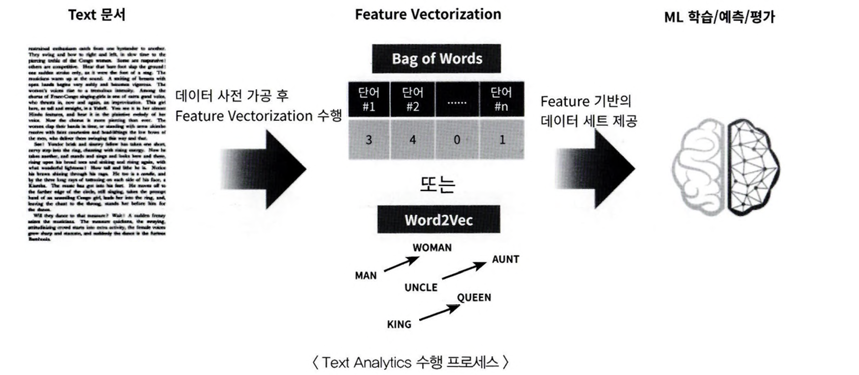

### 파이썬 기반의 NLP 텍스트 분석 패키지
- NLTK: 수행속도로 인해 실제 대량 데이터 기반에서는 제대로 활용 X
- Gensim: 토픽 모델링에서 두각, 신기능 제공, 가장 많이 사용되는 NLP 패키지
- SpaCy: 가장 주목 받는 NLP 패키지, 애플리케이션 이용사례 증가

## 2. 텍스트 사전 준비 작업(텍스트 전처리 - 텍스트 정규화

#### 1) 클렌징 Cleansing  
: 불필요한 문자, 기호 사전 제거 ex) HTML, XML, 태그, 특정기호
#### 2) 토큰화(Tokenization)  
: 문장 토큰화(문서 -> 문장 분리), 단어 토큰화(문장 -> 단어 분리)
- 문장토큰화: sent_tokenize 이용 -> list 객체 반환
- 단어토큰화: word_tokenize 이용 -> list 객체 반환
- n-gram: 연속된 n개의 단어를 하나의 토큰화 단위로 분리 -> 문맥적 의미 무시 문제 보완  
    ex. "Agent Smith knocks the door" -> 2-gram(bigram)  
    =>  (Agent, Smith), (Smith, knocks), (knocks, the), (the, door)


#### 3) 필터링/불용어(Stop word) 제거/철자 수정  
: 필수 문법 요소이지만, 문맥적으로 의미가 없는 단어
ex. is, the, a, will


#### 4) Stemming과 Lemmatization: 단어의 원형을 찾는 것
- Stemming - **Porter, Lancaster, Snowball, Stemmer**  
    : 원래단어에서 일부 철자가 훼손된 어근 단어를 추출하는 경향이 있음
- Lemmatization - **WordNetLemmatizer**  
    : 보다 정교, 의미론적 기반에서 단어의 원형을 찾음, 문법적 요소와 이미적 부분 감안하여 정확한 철자로 된 어근 단어를 찾아줌
- 속도: Lemmatization < Stemming

- 문장 토큰화

In [2]:
from nltk import sent_tokenize
import nltk
nltk.download('punkt')
text_sample = 'The Matrix is everywhere its all around us, here even in this room. \
                You can see it out your window or on your television. \
                You feel it when you go to work, or go to church or pay your taxes.'
sentences = sent_tokenize(text=text_sample)
print(type(sentences), len(sentences))
print(sentences)


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


<class 'list'> 3
['The Matrix is everywhere its all around us, here even in this room.', 'You can see it out your window or on your television.', 'You feel it when you go to work, or go to church or pay your taxes.']


- 단어토큰화

In [4]:
from nltk import word_tokenize

sentence =  "The Matrix is everywhere its all around us, here even in this room."
words = word_tokenize(sentence)
print(type(words), len(words))
print(words)

<class 'list'> 15
['The', 'Matrix', 'is', 'everywhere', 'its', 'all', 'around', 'us', ',', 'here', 'even', 'in', 'this', 'room', '.']


-

In [5]:
from nltk import word_tokenize, sent_tokenize

# 여러 개의 문장으로 된 입력 데이터를 문장별로 단어 토큰화하게만드는 함수 생성
def tokenize_text(text):
    # 문장별로 분리 토큰
    sentences = sent_tokenize(text)
    # 분리된 문장별 단어 톸큰화
    word_tokens = [word_tokenize(sentence) for sentence in sentences]
    return word_tokens

# 여러 문장에 대해 문장별 단어 토큰화 수행
word_tokens = tokenize_text(text_sample)
print(type(word_tokens), len(word_tokens))
print(word_tokens)

<class 'list'> 3
[['The', 'Matrix', 'is', 'everywhere', 'its', 'all', 'around', 'us', ',', 'here', 'even', 'in', 'this', 'room', '.'], ['You', 'can', 'see', 'it', 'out', 'your', 'window', 'or', 'on', 'your', 'television', '.'], ['You', 'feel', 'it', 'when', 'you', 'go', 'to', 'work', ',', 'or', 'go', 'to', 'church', 'or', 'pay', 'your', 'taxes', '.']]


- 불용어 처리

In [6]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [12]:
print('영어 stop words 개수:', len(nltk.corpus.stopwords.words('english')))
print(nltk.corpus.stopwords.words('english')[:20])

영어 stop words 개수: 179
['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his']


-stop words 필터링

In [14]:
import nltk

stopwords = nltk.corpus.stopwords.words('english')
all_tokens = []
# 위 예제에서 3개의 문장별로 얻은 word_tokens list에 대해 스톱 워드를 제거하는 반복문
for sentence in word_tokens:
    filtered_words = []
    # 개별 문장별로 토큰화된 문장 list에 대해 스톱 워드를 제거하는 반복문
    for word in sentence:
        #소문자로 모두 변환
        word = word.lower()
        # 토큰화된 개별 단어가 스톱 워드의 단어에 포함되지 않으면 word_tokens에 추가
        if word not in stopwords:
            filtered_words.append(word)
    all_tokens.append(filtered_words)

print(all_tokens)

[['matrix', 'everywhere', 'around', 'us', ',', 'even', 'room', '.'], ['see', 'window', 'television', '.'], ['feel', 'go', 'work', ',', 'go', 'church', 'pay', 'taxes', '.']]


- Stemming

In [15]:
from nltk.stem import LancasterStemmer
stemmer = LancasterStemmer()

print(stemmer.stem('working'), stemmer.stem('works'), stemmer.stem('worked'))
print(stemmer.stem('amusing'), stemmer.stem('amuses'), stemmer.stem('amused'))
print(stemmer.stem('happier'), stemmer.stem('happiest'))
print(stemmer.stem('fancier'), stemmer.stem('fanciest'))

work work work
amus amus amus
happy happiest
fant fanciest


- Lemmatization

In [16]:
from nltk.stem import WordNetLemmatizer
import nltk
nltk.download('wordnet')

lemma = WordNetLemmatizer()
print(lemma.lemmatize('amusing', 'v'), lemma.lemmatize('amuses', 'v'), lemma.lemmatize('amused', 'v'))
print(lemma.lemmatize('happier', 'a'), lemma.lemmatize('happiest', 'a'))
print(lemma.lemmatize('fancier', 'a'), lemma.lemmatize('fanciest', 'a'))

[nltk_data] Downloading package wordnet to /root/nltk_data...


amuse amuse amuse
happy happy
fancy fancy


## 3. Bag of Words - BOW
: 문서의 모든 단어를 문맥이나 순서를 무시하고 일괄적으로 단어에 대해 빈도값 부여 -> 피처값 추출하는 모델
- 단어수(Word Count) 기반 피처 추출

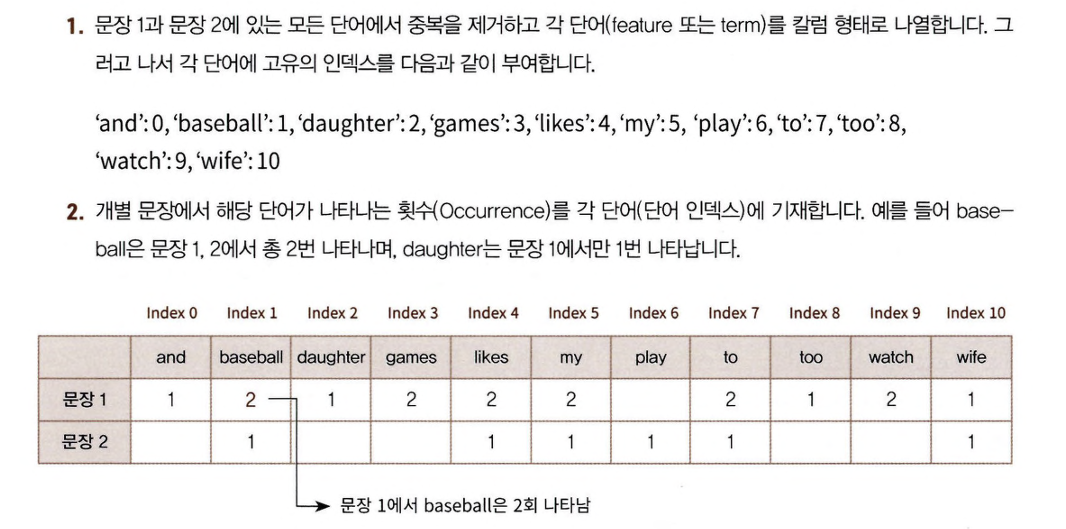

- 장점: 쉽고 빠른 구축
- 단점
    - 문맥의미 반영 부족
    - 최소행렬문제(희소성, 희소행렬)

### BOW 피처 벡터화
- 문서의 텍스트를 단어로 추출 -> 피처 할당
- 각 단어의 발생 빈도와 같은 값이 피처에 값으로 부여해 각 문서를 이 단어 피처의 발생 빈도 값으로 구성된 벡터로 만드는 기법
- M개의 문서, 총 단어 수 N개 -> MXN 단어 피처로 이뤄진 행렬
    - 카운트 기반의 벡터화: 빈도 높을 수록 중요도 높음
    - TF-IDF 기반의 벡터화: 개별 문서에서 자주 등장하면 높은 가중치주되, 전반적인 문서에서 나타나면 페널티 부여

### 사이킷런의 Count 및 TF-IDF 벡터화 구현: CountVectorizer, TfidfVectorizer
- CountVectorizer
- TfidVectorizer


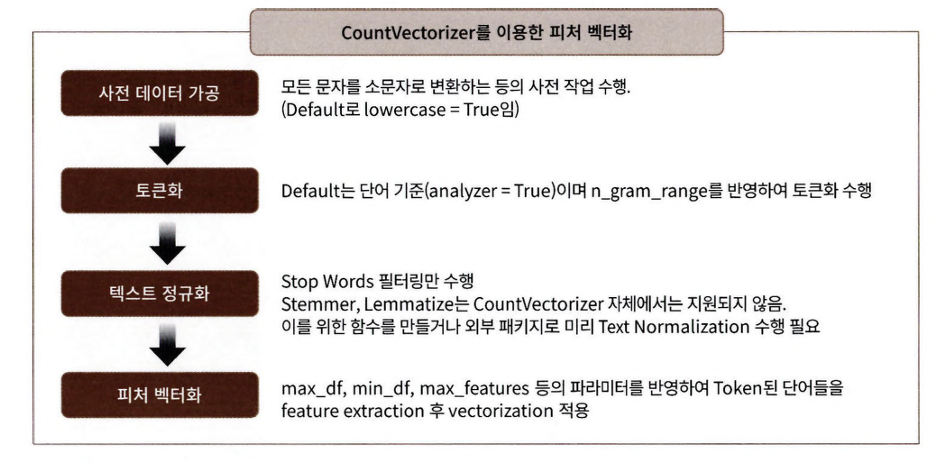

 ### BOW 벡터화를 위한 희소 행렬

###희소행렬-COO 형식

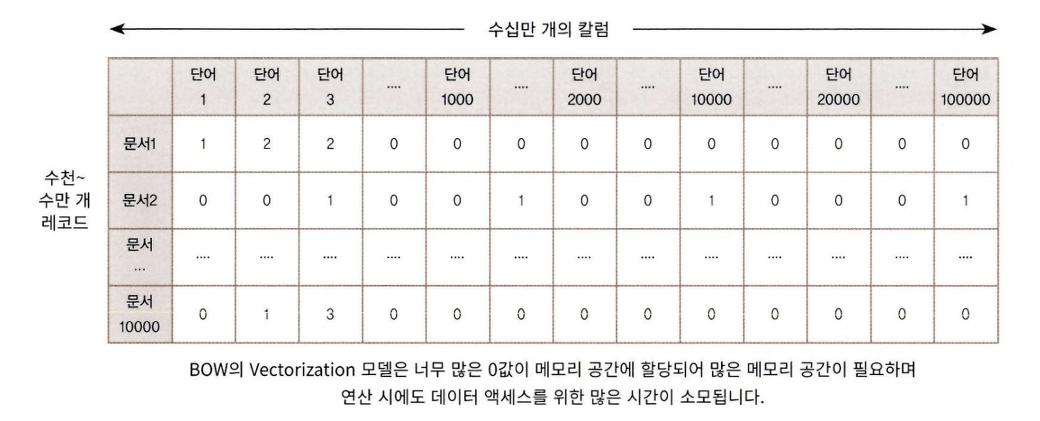

- 희소행렬 - COO 형식

In [17]:
import numpy as np
dense = np.array([[3,0,1],
                  [0,2,0]])

In [18]:
from scipy import sparse

# 0이 아닌 데이터 추출
data = np.array([3,1,2])

# 행 위치와 열 위치를 각각 배열로 생성
row_pos = np.array([0,0,1])
col_pos = np.array([0,2,1])

# sparse 패키지의 coo_matrix를 이용해 COO 형식으로 희소 행렬 생성
sparse_coo = sparse.coo_matrix((data, (row_pos, col_pos)))

In [19]:
sparse_coo.toarray()

array([[3, 0, 1],
       [0, 2, 0]])

- 희소행렬 - CSR 형식

In [22]:
from scipy import sparse

dense2 = np.array([[0, 0, 1, 0, 0, 5],
                   [1, 4, 0, 3, 2, 5],
                   [0, 6, 0, 3, 0, 0],
                   [2, 0, 0, 0, 0, 0],
                   [1, 0, 0, 7, 0, 8],
                    [1, 0, 0, 0, 0, 0]])

# 0이 아닌 데이터 추출
data2 = np.array([1, 5, 1, 4, 3, 2, 5, 6, 3, 2, 7, 8, 1])

# 행 위치와 열 위치를 각각 array로 생성
row_pos = np.array([0,0,1,1,1,1,1,2,2,3,4,4,5])
col_pos = np.array([2,5,0,1,3,4,5,1,3,0,3,5,0])

# COO 형식으로 변환
sparse_coo = sparse.coo_matrix((data2, (row_pos, col_pos)))

# 행 위치 배열의 고유한 값의 시작 위치 인덱스를 배열로 생성
row_pos_ind = np.array([0,2,7,9,10,12,13])

# CSR 형식으로 변환
sparse_csr = sparse.csr_matrix((data2, col_pos, row_pos_ind))

print('COO 변환된 데이터가 제대로 되었는지 다시 Dense로 출력 확인')
print(sparse_coo.toarray())
print('CSR 변환된 데이터가 제대로 되었는지 다시 Dense로 출력 확인')
print(sparse_csr.toarray())

COO 변환된 데이터가 제대로 되었는지 다시 Dense로 출력 확인
[[0 0 1 0 0 5]
 [1 4 0 3 2 5]
 [0 6 0 3 0 0]
 [2 0 0 0 0 0]
 [0 0 0 7 0 8]
 [1 0 0 0 0 0]]
CSR 변환된 데이터가 제대로 되었는지 다시 Dense로 출력 확인
[[0 0 1 0 0 5]
 [1 4 0 3 2 5]
 [0 6 0 3 0 0]
 [2 0 0 0 0 0]
 [0 0 0 7 0 8]
 [1 0 0 0 0 0]]


In [23]:
dense3 = np.array([[0, 0, 1, 0, 0, 5],
 [1, 4, 0, 3, 2, 5],
 [0, 6, 0, 3, 0, 0],
 [2, 0, 0, 0, 0, 0],
 [0, 0, 0, 7, 0, 8],
[1, 0, 0, 0, 0, 0]])

coo = sparse.coo_matrix(dense3)
csr = sparse.csr_matrix(dense3)